In [2]:
import numpy as np
from scipy import spatial

In [2]:
class node:
    normal = np.zeros((3,1))
    label = 0
    def __init__(self, x=0.0, y = 0.0, z = 0.0):
        self.x = x
        self.y = y
        self.z = z
    def is_empty(self):
        return self.x==0.0 and self.y==0.0 and self.z==0.0
    def coordination(self):
        return np.mat([self.x,self.y,self.z])

In [24]:
def load_data(file_dir):
    data ={}
    is_empty = {}
    f = open(file_dir)
    col = int(f.readline())
    row = int(f.readline())
    for i in range(8):
        f.readline()
    for i in range(col):
        for j in range(row):
            line = f.readline()
            temp = line.split()
            data[(i,j)] = np.array([float(temp[0]),float(temp[1]),float(temp[2])])
            if np.all(np.less(data[(i,j)],np.array(0.01))):
                is_empty[(i,j)] = True
            else:
                is_empty[(i,j)] = False
    return data, is_empty, col, row

In [38]:
def compute_normal(data,is_empty,col,row):
    normal = {}
    for i in data:
        neighbors = []
        c = i[0]
        r = i[1]
        if not is_empty[i] and c-1>=0 and c+1<col and r-1>=0 and r+1<row:
            for j in [-1,0,1]:
                for k in [-1,0,1]:
                    if not is_empty[(c+j,r+k)]:
                        neighbors.append(data[(c+j,r+k)])
        if len(neighbors)>1:
            normal[i] = get_normal_vector(neighbors)
    return normal

In [39]:
def get_normal_vector(neighbors):
    center = np.zeros((3,),dtype='float')
    for p in neighbors:
        center+=p
    center = center/len(neighbors)
    cov = np.zeros((3,3),dtype='float')
    for p in neighbors:
        pprime = p-center
        cov+=pprime*pprime.T
    w,v = np.linalg.eig(cov)
    return v[np.argmin(w)]

In [28]:
data,is_empty,col,row = load_data('/home/near/Documents/3d/DATA/NECorner.ptx')

In [40]:
normal = compute_normal(data,is_empty,col,row)

In [42]:
def get_distance(a,b,c):
    return max(np.dot(a,b),np.dot(a,c))

In [43]:
def is_connected(data,normal,a,b):
    angle = spatial.distance.cosine(normal[a],normal[b])
    distance = get_distance(data[a]-data[b],normal[a],normal[b])
    if angle<0.8 or distance>0.001:
        return False
    return True

In [45]:
def set_label(data,is_empty,normal,visited,l,i,j,label):
    q = [(i,j)]
    while len(q)>0:
            tmp = q.pop(0)
            ii = tmp[0]
            jj = tmp[1]
            if visited[(ii,jj)]==True or is_empty[(ii,jj)]:
                continue
            visited[(ii,jj)] = True
            l[(ii,jj)] = label
            if ii-1>=0 and visited[(ii-1,jj)] == False and not is_empty[(ii-1,jj)] and is_connected(data,normal,(ii,jj),(ii-1,jj)):
                    q.append((ii-1,jj))
            if ii+1<col and visited[(ii+1,jj)] == False and not is_empty[(ii+1,jj)] and is_connected(data,normal,(ii,jj),(ii+1,jj)):
                    q.append((ii+1,jj))
            if jj-1>=0 and visited[(ii,jj-1)] == False and not is_empty[(ii,jj-1)] and is_connected(data,normal,(ii,jj),(ii,jj-1)):
                    q.append((ii,jj-1))
            if jj+1<row and visited[(ii,jj+1)] == False and not is_empty[(ii,jj+1)] and is_connected(data,normal,(ii,jj),(ii,jj+1)):
                    q.append((ii,jj+1))
            if ii-1>=0 and jj-1>=0 and visited[(ii-1,jj-1)] == False and not is_empty[(ii-1,jj-1)] and is_connected(data,normal,(ii,jj),(ii-1,jj-1)):
                    q.append((ii-1,jj-1))
            if ii-1>=0 and jj+1<row and visited[(ii-1,jj+1)] == False and not is_empty[(ii-1,jj+1)] and is_connected(data,normal,(ii,jj),(ii-1,jj+1)):
                    q.append((ii-1,jj+1))
            if ii+1<col and jj-1>=0 and visited[(ii+1,jj-1)]==False and not is_empty[(ii+1,jj-1)] and is_connected(data,normal,(ii,jj),(ii+1,jj-1)):
                    q.append((ii+1,jj-1))
            if ii+1<col and jj+1<row and visited[(ii+1,jj+1)] == False and not is_empty[(ii+1,jj+1)] and is_connected(data,normal,(ii,jj),(ii+1,jj+1)):
                    q.append((ii+1,jj+1))

In [47]:
label=1
l = {}
visited = {}
for i in range(col):
    for j in range(row):
        visited[(i,j)] = False
for i in range(col):
    for j in range(row):
        if not visited[(i,j)] and not not is_empty[(i,j)]:
            set_label(data,is_empty,normal,visited,l,i,j,label)
            label+=1

In [48]:
pp = np.zeros((col,row),dtype='int')
for i in l:
    pp[i[0],i[1]] = l[i]

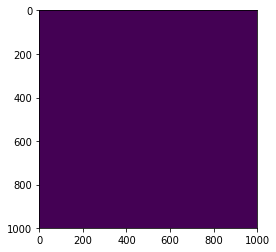

In [49]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.imshow(pp)
plt.show()

In [4]:
def get_centroid(sub_mat):
    temp = []
    for ele in sub_mat:
        if node.is_empty:
            continue
        else:
            temp.append(ele)
    if len(temp)==0:
        return np.mat([0.0,0.0,0.0])
    else:
        x = np.mean([ele.x for ele in temp])
        y = np.mean([ele.y for ele in temp])
        z = np.mean([ele.z for ele in temp])
        return np.mat([x,y,z])

In [ ]:
def get_nomr

In [5]:
def to_vector(n):
    return np.mat([n.x,n.y,n.z])

In [42]:
def compute_normal(mat, i, j, row, col):
    #find the KXK neighborhood nodes for node mat[i][j]
    #if it is at the corner, find the boundary
    #exclude the empty one
    if i-1<0:
        l = 0
        r = 7
    elif i+2>=col:
        l = col-3
        r = col
    else:
        l = i-1
        r = i+2
    if j-1<0:
        u = 0
        d = 3
    elif j+2>=row:
        u = row-3
        d = row
    else:
        u = j-1
        d = j+2
    
    sub_mat = []
    for ii in range(l,r):
        for jj in range(u,d):
            sub_mat.append(mat[ii,jj])
    #find all pairs of three points and calculate the center point
    c = get_centroid(sub_mat)
    pprime = c-to_vector(mat[i,j])
    w,v = np.linalg.eig(np.matmul(pprime.T,pprime))
    return v[:,np.argmin(w)]

In [43]:
for i in range(col):
    for j in range(row):
        mat[i,j].normal = compute_normal(mat, i, j, row, col)

In [44]:
#apply region growing algorithm
def set_label(mat,i,j,col,row,label,visited):
    if i<0 or i>=col or j<0 or j>=row or visited[i][j]==True:
        return
    else:
        q = [(i,j)]
        while len(q)!=0:
            tmp = q.pop(0)
            ii = tmp[0]
            jj = tmp[1]
            if visited[ii][jj]==True or mat[ii,jj].is_empty():
                continue
            visited[ii][jj] = True
            mat[ii,jj].label = label
            if ii-1>=0 and visited[ii-1][jj] == False and not mat[ii-1,jj].is_empty() and is_connected(mat[ii,jj],mat[ii-1,jj]):
                    q.append((ii-1,jj))
            if ii+1<col and visited[ii+1][jj] == False and not mat[ii+1,jj].is_empty() and is_connected(mat[ii,jj],mat[ii+1,jj]):
                    q.append((ii+1,jj))
            if jj-1>=0 and visited[ii][jj-1] == False and not mat[ii,jj-1].is_empty() and is_connected(mat[ii,jj],mat[ii,jj-1]):
                    q.append((ii,jj-1))
            if jj+1<row and visited[ii][jj+1] == False and not mat[ii,jj+1].is_empty() and is_connected(mat[ii,jj],mat[ii,jj+1]):
                    q.append((ii,jj+1))
            if ii-1>=0 and jj-1>=0 and visited[ii-1][jj-1] == False and not mat[ii-1,jj-1].is_empty() and is_connected(mat[ii,jj],mat[ii-1,jj-1]):
                    q.append((ii-1,jj-1))
            if ii-1>=0 and jj+1<row and visited[ii-1][jj+1] == False and not mat[ii-1,jj+1].is_empty() and is_connected(mat[ii,jj],mat[ii-1,jj+1]):
                    q.append((ii-1,jj+1))
            if ii+1<col and jj-1>=0 and visited[ii+1][jj-1]==False and not mat[ii+1,jj-1].is_empty() and is_connected(mat[ii,jj],mat[ii+1,jj-1]):
                    q.append((ii+1,jj-1))
            if ii+1<col and jj+1<row and visited[ii+1][jj+1] == False and not mat[ii+1,jj+1].is_empty() and is_connected(mat[ii,jj],mat[ii+1,jj+1]):
                    q.append((ii+1,jj+1))
        return

In [57]:
def is_connected(node1,node2):
    angle = spatial.distance.cosine(node1.normal, node2.normal)
    distance = get_distance(node1,node2)
    if angle<0.8 or distance>0.001:
        return False
    return True

In [53]:
def get_distance(node1,node2):
    v1 = np.asarray(node1.coordination())
    v2 = np.asarray(node2.coordination())
    v = v1-v2
    return max(np.abs(np.dot(np.asarray(node1.normal.T),v.T)),np.abs(np.dot(np.asarray(node2.normal.T),v.T)))

In [58]:
label = 1
visited = {}
for i in range(col):
    visited[i] ={}
    for j in range(row):
        visited[i][j] = False
for i in range(col):
    for j in range(row):
        if visited[i][j]==False and not mat[i,j].is_empty():
            set_label(mat,i,j,col,row,label,visited)
            label+=1

In [50]:
np.asarray(mat[0,0].coordination()).shape

(1, 3)

In [13]:
node1 = mat[600,600]
node2 = mat[601,601]

In [59]:
label = []
for i in range(col):
    temp = []
    for j in range(row):
        temp.append(mat[i,j].label)
    label.append(temp)

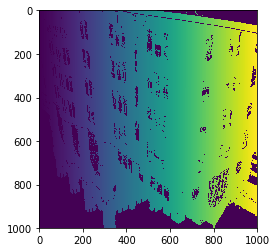

In [60]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.imshow(np.asarray(label).T)
plt.show()

In [16]:
angle = spatial.distance.cosine(node1.normal, node2.normal)

In [31]:
v1 = np.asarray(node1.coordination())
v2 = np.asarray(node2.coordination())
v = v1-v2
print(max(np.abs(np.dot(np.asarray(node1.normal),v.T)),np.abs(np.dot(np.asarray(node2.normal),v.T))))

[[ 0.02713362]]


In [61]:
len(list(set(np.asarray(label).flatten())))

797807

In [ ]:
twelve_colors=['#525252','#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00','#ffff33', '#a65628', '#999999','#f781bf','#bababa','#404040']
#ax.scatter(data[:,0], data[:,1], data[:,2], ,s=2.5, linewidth=0.1)
if save_fig:
    ax = plt.axes(projection = '3d')
    if data.shape[0]>0:
    #ax.scatter(data[i,0], data[i,1], data[i,2], c=eleven_colors[color_lbl[i]-1], alpha=0.65)
     #print "color_lbl[i]-1",color_lbl[i]-1
        for i in xrange(data.shape[0]):
            if plot_style ==0:
                ax.scatter(data[i,0], data[i,1], data[i,2],s=2.5,c=twelve_colors[data[i,3]%12], linewidth=0.1,alpha=0.35)
            if plot_style ==1:
                ax.scatter(data[i,0], data[i,1], data[i,2],s=1.5,c=twelve_colors[data[i,3]%12], linewidth=0.1,alpha=0.15)
#ax.scatter(data[:,0], data[:,1], data[:,2], c=lbl, alpha=0.65)
#ax.set_xlim3d(-80, -40)
#ax.set_ylim3d(290, 330)
#ax.set_zlim3d(-36 , -32)
#plt.show()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(file_name)
    plt.savefig('./result/'+file_name, dpi = (200))
    plt.show()
    plt.close()
